**Import Librery**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# !pip install SciPy --user -q
import scipy 
#!pip install Pillow --user -q
import PIL
print(tf.__version__)
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)

import glob
import os
import json
import pandas as pd
from matplotlib import image
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

2.0.0-beta1


**Load Dataset**

In [2]:
# Dataset folder structure
data_path = '/home/aanwar/models/research/slim/data/data/visualwakewords/'
count = 0
for name in glob.glob(data_path+'*'):
    print (name)
    if count == 3: break
    count +=1

/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset
/home/aanwar/models/research/slim/data/data/visualwakewords/labels.txt
/home/aanwar/models/research/slim/data/data/visualwakewords/instances_visualwakewords_train2014.json
/home/aanwar/models/research/slim/data/data/visualwakewords/instances_visualwakewords_val2014.json


In [3]:
# Labels
with open(data_path + 'labels.txt') as file:
    Labels = file.read()
print(Labels)

0:background
1:person



In [4]:
# make classes based on the given labels
classes = []
file1 = open(data_path + 'labels.txt', 'r')
 
while True:
    line = file1.readline()
    if not line:
        break
    classes.append(line.strip().split(':')[1])
 
file1.close()
print(classes)

['background', 'person']


In [5]:
# Training Data
train_data = '/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/'

count = 0
for name in glob.glob(train_data+'*'):
    print (name)
    count +=1
    if count == 4: break

/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000270070.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000101772.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000359320.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000486482.jpg


In [6]:
# Total Train Data available

totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(train_data):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1
        
print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

Searching in :  /home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/
Total number of files 82783
Total Number of directories 0
Total: 82783


In [7]:
# Training Data
test_data = '/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/'

count = 0
for name in glob.glob(test_data+'*'):
    print (name)
    count +=1
    if count == 4: break

/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/COCO_val2014_000000324670.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/COCO_val2014_000000464263.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/COCO_val2014_000000526418.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/COCO_val2014_000000230593.jpg


In [8]:
# Total Test Data available

totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(test_data):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1
        
print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

Searching in :  /home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/
Total number of files 40504
Total Number of directories 0
Total: 40504


In [9]:
def get_data(path, json_file, split):
    with open(json_file) as f:
        data = json.load(f)
        
    img_id = []; img_path = [];img_name=[]; label = []; cls = []
    
    for k in data['annotations']:
        img_id.append(k)

        im_path = path + 'COCO_'+ split +'2014_' + '%012d.jpg' % (int(k))      
        img_path.append(im_path)
        
        im_name = 'COCO_'+ split +'2014_' + '%012d.jpg' % (int(k))      
        img_name.append(im_name)
        
        lab = data['annotations'][k]['label']
        label.append(lab)
        
        if lab == 1:
            cls.append('person')
        else: 
            cls.append('background')

    return pd.DataFrame(list(zip(img_id, img_name, img_path,label, cls)), 
                      columns =['id','name', 'path', 'label','cls'])

       id                             name  \
0   57870  COCO_train2014_000000057870.jpg   
1  384029  COCO_train2014_000000384029.jpg   
2  222016  COCO_train2014_000000222016.jpg   
3  520950  COCO_train2014_000000520950.jpg   
4   69675  COCO_train2014_000000069675.jpg   

                                                path  label         cls  
0  /home/aanwar/models/research/slim/data/data/vi...      0  background  
1  /home/aanwar/models/research/slim/data/data/vi...      1      person  
2  /home/aanwar/models/research/slim/data/data/vi...      1      person  
3  /home/aanwar/models/research/slim/data/data/vi...      0  background  
4  /home/aanwar/models/research/slim/data/data/vi...      1      person  


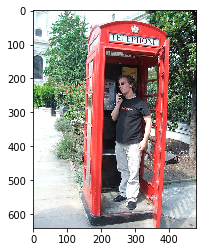

In [10]:
split = "train"
path = '/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/'
json_file = '/home/aanwar/models/research/slim/data/data/visualwakewords/instances_visualwakewords_train2014.json'
df_train = get_data(path, json_file, split)
print(df_train.head())
img = plt.imread(df_train['path'][2])
plt.imshow(img)
plt.show()

       id                           name  \
0  391895  COCO_val2014_000000391895.jpg   
1  522418  COCO_val2014_000000522418.jpg   
2  184613  COCO_val2014_000000184613.jpg   
3  318219  COCO_val2014_000000318219.jpg   
4  554625  COCO_val2014_000000554625.jpg   

                                                path  label     cls  
0  /home/aanwar/models/research/slim/data/data/vi...      1  person  
1  /home/aanwar/models/research/slim/data/data/vi...      1  person  
2  /home/aanwar/models/research/slim/data/data/vi...      1  person  
3  /home/aanwar/models/research/slim/data/data/vi...      1  person  
4  /home/aanwar/models/research/slim/data/data/vi...      1  person  


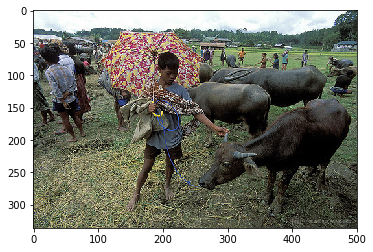

In [11]:
split = "val"
path = '/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/'
json_file = '/home/aanwar/models/research/slim/data/data/visualwakewords/instances_visualwakewords_val2014.json'
df_test = get_data(path, json_file, split)
print(df_test.head())
img = plt.imread(df_test['path'][2])
plt.imshow(img)
plt.show()

**Display Sample files**

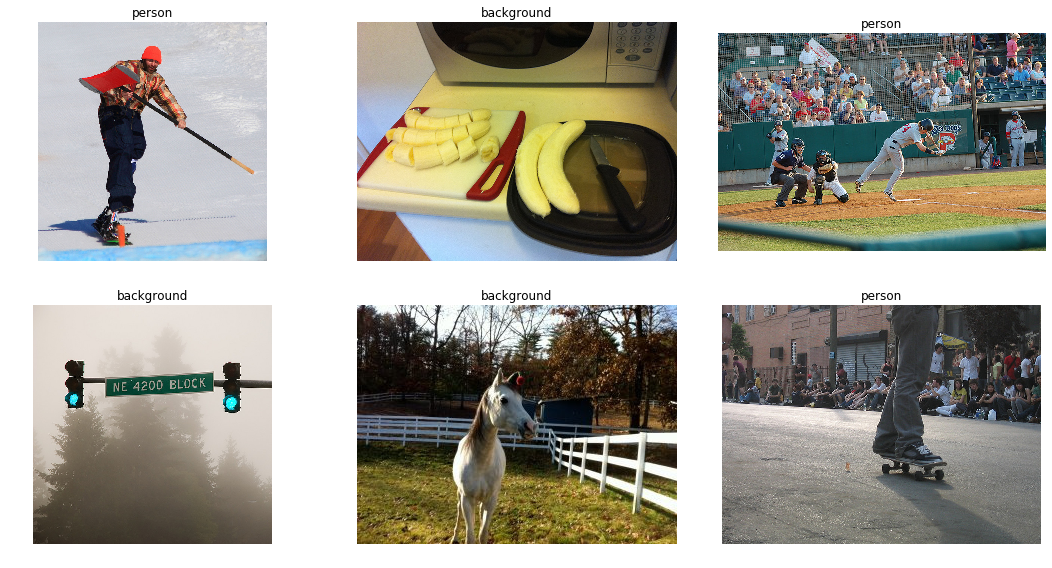

In [12]:
## Sample train files

np.random.seed(222)
samples = np.random.choice(len(df_train), 6)

imgs = []
lab = []
for sample in samples:
    imgs.append(plt.imread(df_train['path'][sample]))
    lab.append(df_train['label'][sample])

fig, ax = plt.subplots(2,3, figsize=(15,8))
ax[0][0].imshow(imgs[0]); ax[0][0].axis('off'); ax[0][0].set_title(classes[lab[0]])
ax[0][1].imshow(imgs[1]); ax[0][1].axis('off'); ax[0][1].set_title(classes[lab[1]])
ax[0][2].imshow(imgs[2]); ax[0][2].axis('off'); ax[0][2].set_title(classes[lab[2]])
ax[1][0].imshow(imgs[3]); ax[1][0].axis('off'); ax[1][0].set_title(classes[lab[3]])
ax[1][1].imshow(imgs[4]); ax[1][1].axis('off'); ax[1][1].set_title(classes[lab[4]])
ax[1][2].imshow(imgs[5]); ax[1][2].axis('off'); ax[1][2].set_title(classes[lab[5]])
fig.tight_layout()
plt.show()

/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/COCO_val2014_000000052546.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/COCO_val2014_000000419309.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/COCO_val2014_000000499618.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/COCO_val2014_000000538819.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/COCO_val2014_000000028993.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/COCO_val2014_000000428105.jpg


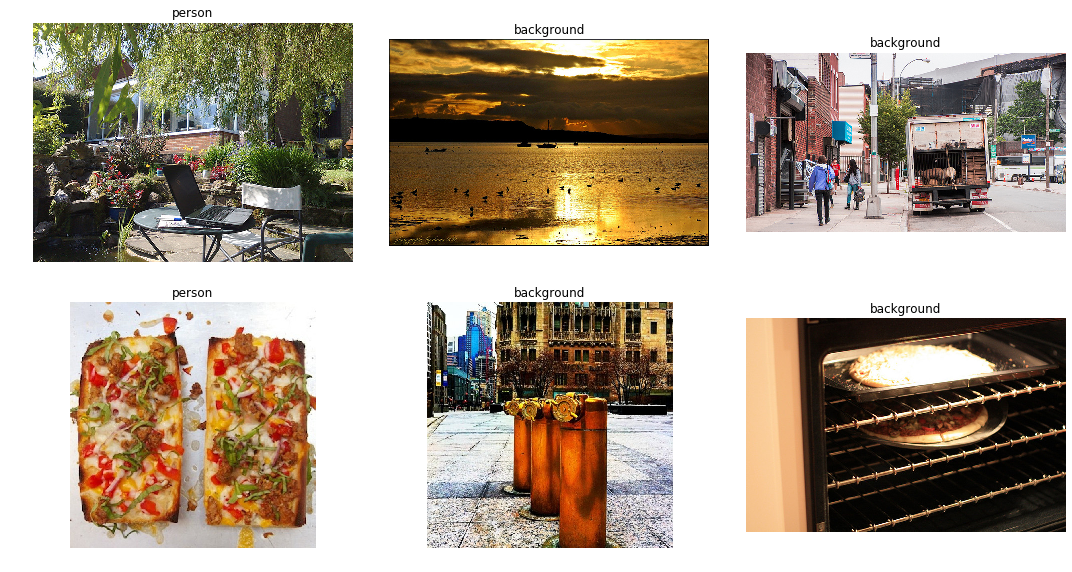

In [13]:
## Sample test files

np.random.seed(222)
samples = np.random.choice(len(df_test), 6)

imgs = []
lab = []
for sample in samples:
    print(df_test['path'][sample])
    imgs.append(plt.imread(df_test['path'][sample]))
    lab.append(df_train['label'][sample])

fig, ax = plt.subplots(2,3, figsize=(15,8))
ax[0][0].imshow(imgs[0]); ax[0][0].axis('off'); ax[0][0].set_title(classes[lab[0]])
ax[0][1].imshow(imgs[1]); ax[0][1].axis('off'); ax[0][1].set_title(classes[lab[1]])
ax[0][2].imshow(imgs[2]); ax[0][2].axis('off'); ax[0][2].set_title(classes[lab[2]])
ax[1][0].imshow(imgs[3]); ax[1][0].axis('off'); ax[1][0].set_title(classes[lab[3]])
ax[1][1].imshow(imgs[4]); ax[1][1].axis('off'); ax[1][1].set_title(classes[lab[4]])
ax[1][2].imshow(imgs[5]); ax[1][2].axis('off'); ax[1][2].set_title(classes[lab[5]])
fig.tight_layout()
plt.show()

**Train and Test Dataset Analysis**

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82783 entries, 0 to 82782
Data columns (total 5 columns):
id       82783 non-null object
name     82783 non-null object
path     82783 non-null object
label    82783 non-null int64
cls      82783 non-null object
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40504 entries, 0 to 40503
Data columns (total 5 columns):
id       40504 non-null object
name     40504 non-null object
path     40504 non-null object
label    40504 non-null int64
cls      40504 non-null object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


**make a smaler train file for basic model test**

In [16]:
df_train_small = df_train.sample(frac=0.20)

In [17]:
df_train_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16557 entries, 56247 to 21380
Data columns (total 5 columns):
id       16557 non-null object
name     16557 non-null object
path     16557 non-null object
label    16557 non-null int64
cls      16557 non-null object
dtypes: int64(1), object(4)
memory usage: 776.1+ KB


In [18]:
df_test_small = df_test.sample(frac=0.20)

In [19]:
df_test_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 39579 to 23484
Data columns (total 5 columns):
id       8101 non-null object
name     8101 non-null object
path     8101 non-null object
label    8101 non-null int64
cls      8101 non-null object
dtypes: int64(1), object(4)
memory usage: 379.7+ KB


**Datagenerator**

In [20]:
datagen = ImageDataGenerator(validation_split=0.3,rescale = 1.0/255.)

In [21]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train_small,
    x_col='name', 
    y_col='cls',
    directory=train_data,
    subset='training', 
    target_size=(100,100), 
    batch_size=20,
    color_mode='rgb', 
    clas_mode='categorical'
)
valid_generator = datagen.flow_from_dataframe(
    dataframe=df_train_small,
    x_col='name', 
    y_col='cls',
    directory=train_data,
    subset='validation', 
    target_size=(100,100), 
    batch_size=20,
    color_mode='rgb', 
    clas_mode='categorical'
)

Found 11590 validated image filenames belonging to 2 classes.
Found 4967 validated image filenames belonging to 2 classes.


In [22]:
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test_small,
    x_col='name', 
    y_col='cls',
    directory=test_data,
    subset='training', 
    target_size=(100,100), 
    batch_size=20,
    color_mode='rgb', 
    clas_mode='categorical'
)

Found 5671 validated image filenames belonging to 2 classes.


**Make a base CNN**

In [46]:
tf.random.set_seed(1234)

In [47]:
baseline = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100,100,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
print(baseline.summary())

baseline.compile(loss='binary_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])
print(baseline)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 3,840,386
Trainable params: 3,840,386
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
history = baseline.fit_generator(generator=train_generator,
                    steps_per_epoch=100,
                    validation_data=valid_generator,
                    validation_steps=50,
                    epochs=10
)

Epoch 1/10
100/100 [==============================] - 19s 190ms/step - loss: 7.6672 - accuracy: 0.4955 - val_loss: 7.5819 - val_accuracy: 0.5070
Epoch 2/10
100/100 [==============================] - 17s 169ms/step - loss: 7.7664 - accuracy: 0.4950 - val_loss: 7.5819 - val_accuracy: 0.5070
Epoch 3/10
100/100 [==============================] - 17s 170ms/step - loss: 7.9587 - accuracy: 0.4825 - val_loss: 7.5819 - val_accuracy: 0.5070
Epoch 4/10
100/100 [==============================] - 17s 169ms/step - loss: 7.7895 - accuracy: 0.4935 - val_loss: 7.5819 - val_accuracy: 0.5070
Epoch 5/10
100/100 [==============================] - 17s 172ms/step - loss: 7.7815 - accuracy: 0.4960 - val_loss: 7.5819 - val_accuracy: 0.5070
Epoch 6/10
100/100 [==============================] - 17s 167ms/step - loss: 8.2278 - accuracy: 0.4650 - val_loss: 7.5819 - val_accuracy: 0.5070
Epoch 7/10
100/100 [==============================] - 16s 158ms/step - loss: 7.7895 - accuracy: 0.4935 - val_loss: 7.5819 - val_ac

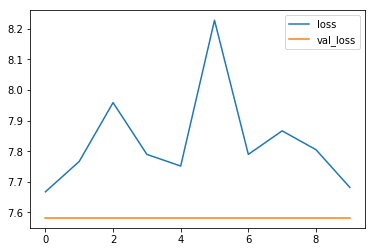

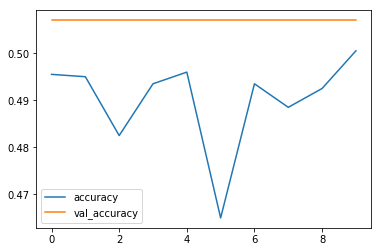

In [49]:
df_hist = pd.DataFrame(history.history)
df_hist[['loss','val_loss']].plot()
df_hist[['accuracy', 'val_accuracy']].plot()
plt.show()

In [26]:
# baseline.save("mymodel")

In [27]:
# from tensorflow import keras

In [28]:
# model = keras.models.load_model('mymodel')

In [29]:
# model.summary()

In [30]:
# baseline.save('s_models/v2')

In [31]:
# model2 = tf.keras.models.load_model('s_models/v1')

In [51]:
test_images = test_generator[0][0]
test_labels = test_generator[0][1]

In [52]:
test_loss, test_acc = baseline.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

20/20 - 0s - loss: 7.6895 - accuracy: 0.5000

Test accuracy: 0.5


In [53]:
predictions = baseline.predict(test_images)

In [54]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [55]:
predictions[2]

array([0., 1.], dtype=float32)

In [56]:
test_labels[2]

array([1., 0.], dtype=float32)

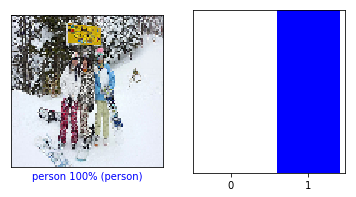

In [57]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img[i], cmap=plt.cm.binary)
    if predictions_array[0] > predictions_array[1]:
        pred = 0
    else: pred = 1
    if true_label[i][0] > true_label[i][1]:
        act = 0
    else: act =1 

    if pred == act:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(classes[pred],
                                100*np.max(predictions_array),
                                classes[act]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    if predictions_array[0] > predictions_array[1]:
        pred = 0
    else: pred = 1
    if true_label[i][0] > true_label[i][1]:
        act = 0
    else: act =1 

    thisplot[pred].set_color('red')
    thisplot[act].set_color('blue')

i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

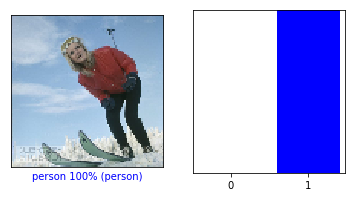

In [58]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

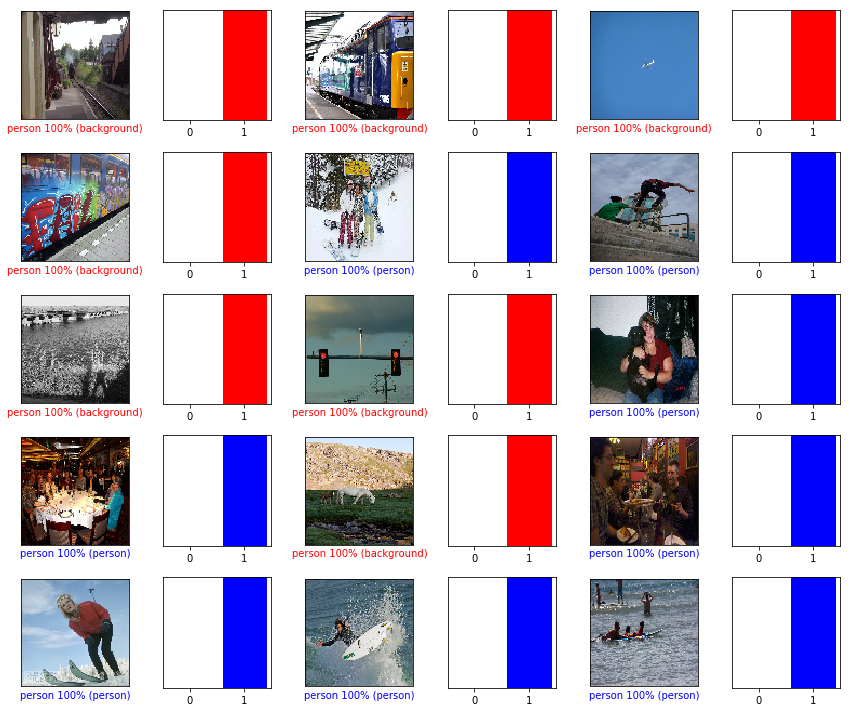

In [59]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [60]:
img = test_images[1]
print(img.shape)

(100, 100, 3)


In [61]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 100, 100, 3)


In [62]:
predictions_single = baseline.predict(img)

print(predictions_single)


[[0. 1.]]


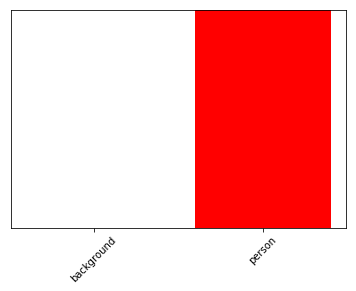

In [63]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(2), classes, rotation=45)
plt.show()

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(250,250,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 53824)            

In [68]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [70]:
datagen = ImageDataGenerator(validation_split=0.3,rescale = 1.0/255.)

In [71]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train_small,
    x_col='name', 
    y_col='cls',
    directory=train_data,
    subset='training', 
    target_size=(250,250), 
    batch_size=20,
    color_mode='rgb', 
    clas_mode='categorical'
)
valid_generator = datagen.flow_from_dataframe(
    dataframe=df_train_small,
    x_col='name', 
    y_col='cls',
    directory=train_data,
    subset='validation', 
    target_size=(250,250), 
    batch_size=20,
    color_mode='rgb', 
    clas_mode='categorical'
)


Found 11590 validated image filenames belonging to 2 classes.
Found 4967 validated image filenames belonging to 2 classes.


In [72]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=100,
                    validation_data=valid_generator,
                    validation_steps=50,
                    epochs=10
)

Epoch 1/10
100/100 [==============================] - 149s 1s/step - loss: 0.7556 - accuracy: 0.5560 - val_loss: 0.6773 - val_accuracy: 0.5980
Epoch 2/10
100/100 [==============================] - 139s 1s/step - loss: 0.6813 - accuracy: 0.5779 - val_loss: 0.6830 - val_accuracy: 0.5630
Epoch 3/10
100/100 [==============================] - 139s 1s/step - loss: 0.6731 - accuracy: 0.5822 - val_loss: 0.6755 - val_accuracy: 0.6405
Epoch 4/10
100/100 [==============================] - 139s 1s/step - loss: 0.6701 - accuracy: 0.5947 - val_loss: 0.6528 - val_accuracy: 0.6335
Epoch 5/10
100/100 [==============================] - 139s 1s/step - loss: 0.6534 - accuracy: 0.6292 - val_loss: 0.6398 - val_accuracy: 0.6465
Epoch 6/10
100/100 [==============================] - 139s 1s/step - loss: 0.6378 - accuracy: 0.6357 - val_loss: 0.6519 - val_accuracy: 0.6500
Epoch 7/10
100/100 [==============================] - 139s 1s/step - loss: 0.6421 - accuracy: 0.6210 - val_loss: 0.6594 - val_accuracy: 0.6125

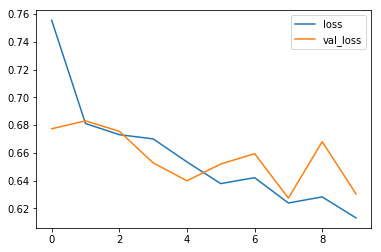

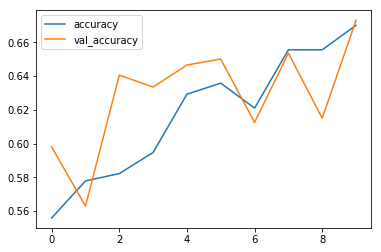

In [73]:
df_hist = pd.DataFrame(history.history)
df_hist[['loss','val_loss']].plot()
df_hist[['accuracy', 'val_accuracy']].plot()
plt.show()


In [74]:
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test_small,
    x_col='name', 
    y_col='cls',
    directory=test_data,
    subset='training', 
    target_size=(250,250), 
    batch_size=20,
    color_mode='rgb', 
    clas_mode='categorical'
)

Found 5671 validated image filenames belonging to 2 classes.


In [76]:
test_images = test_generator[0][0]
test_labels = test_generator[0][1]

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

20/20 - 0s - loss: 0.6012 - accuracy: 0.7000

Test accuracy: 0.7


In [77]:
predictions = model.predict(test_images)

In [80]:
predictions

array([[0.5107419 , 0.4845225 ],
       [0.4249771 , 0.56321764],
       [0.53307337, 0.49064   ],
       [0.43751466, 0.54382956],
       [0.60081863, 0.36381817],
       [0.4031913 , 0.57146364],
       [0.29711255, 0.69152904],
       [0.53553826, 0.46659017],
       [0.21871698, 0.8002753 ],
       [0.47605342, 0.5278532 ],
       [0.6322444 , 0.3766463 ],
       [0.55419844, 0.4288899 ],
       [0.6500047 , 0.3561389 ],
       [0.17874435, 0.84129727],
       [0.48497108, 0.50701994],
       [0.4066877 , 0.584175  ],
       [0.4705726 , 0.5267942 ],
       [0.62209487, 0.37817892],
       [0.4402526 , 0.56255126],
       [0.35961077, 0.6111289 ]], dtype=float32)

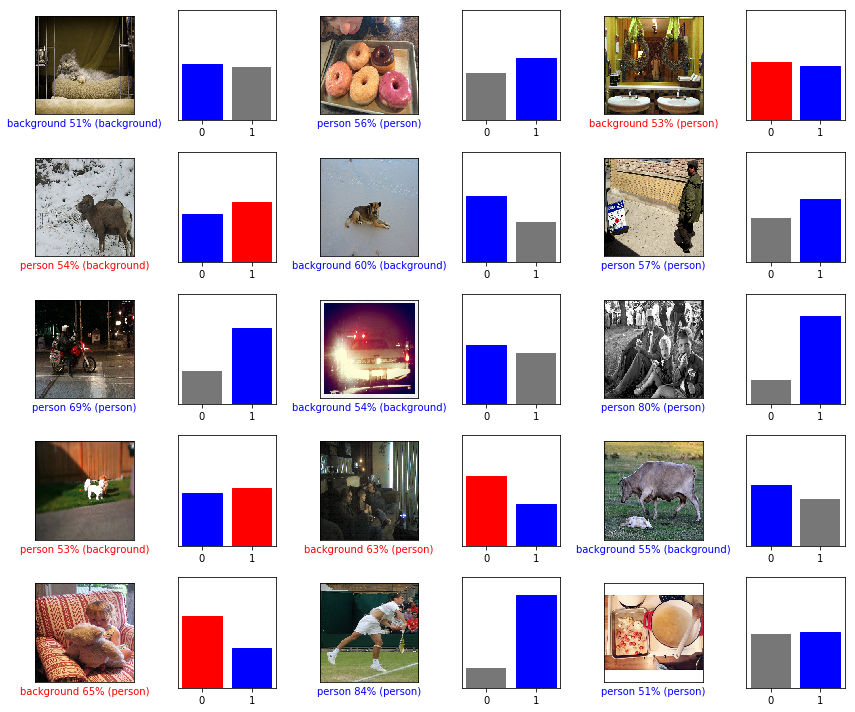

In [78]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(250, 250, 3)
(1, 250, 250, 3)
[[0.42497712 0.5632176 ]]


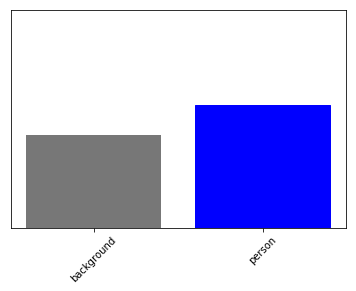

In [82]:
img = test_images[1]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(2), classes, rotation=45)
plt.show()

In [83]:
model.save('advcnn.h5')

In [100]:
from tensorflow.keras.models import load_model
model_reload = load_model('advcnn.h5')

AttributeError: 'str' object has no attribute 'decode'

In [96]:
model.save('/tmp/model')

INFO:tensorflow:Assets written to: /tmp/model/assets


In [97]:
loaded_model = tf.keras.models.load_model('/tmp/model')

In [94]:
from tensorflow import keras 

In [101]:
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test_small,
    x_col='name', 
    y_col='cls',
    directory=test_data,
    subset='training', 
    target_size=(250,250), 
    batch_size=100,
    color_mode='rgb', 
    clas_mode='categorical'
)

Found 5671 validated image filenames belonging to 2 classes.


In [102]:
test_images = test_generator[0][0]
test_labels = test_generator[0][1]

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

100/100 - 1s - loss: 0.6702 - accuracy: 0.6200

Test accuracy: 0.62


In [103]:
predictions = model.predict(test_images)
predictions

array([[0.5082496 , 0.49747455],
       [0.46585146, 0.53193855],
       [0.46638763, 0.5406001 ],
       [0.51756924, 0.46261394],
       [0.64220923, 0.3269487 ],
       [0.40176132, 0.58955795],
       [0.5642845 , 0.43755078],
       [0.4371271 , 0.54007196],
       [0.5110427 , 0.48414475],
       [0.57794565, 0.395898  ],
       [0.4758867 , 0.52661633],
       [0.6689611 , 0.29301906],
       [0.52427596, 0.46099138],
       [0.44481498, 0.57137054],
       [0.5457942 , 0.45346707],
       [0.50691885, 0.47193977],
       [0.44101816, 0.5676026 ],
       [0.6337445 , 0.3736168 ],
       [0.5886726 , 0.40644944],
       [0.51829875, 0.48194167],
       [0.41006434, 0.59048736],
       [0.1850594 , 0.7640364 ],
       [0.440993  , 0.54726046],
       [0.27095145, 0.695919  ],
       [0.4780258 , 0.51791346],
       [0.6732248 , 0.3157292 ],
       [0.68051106, 0.29726237],
       [0.22429168, 0.78930414],
       [0.34492785, 0.6415964 ],
       [0.4912222 , 0.4754715 ],
       [0.

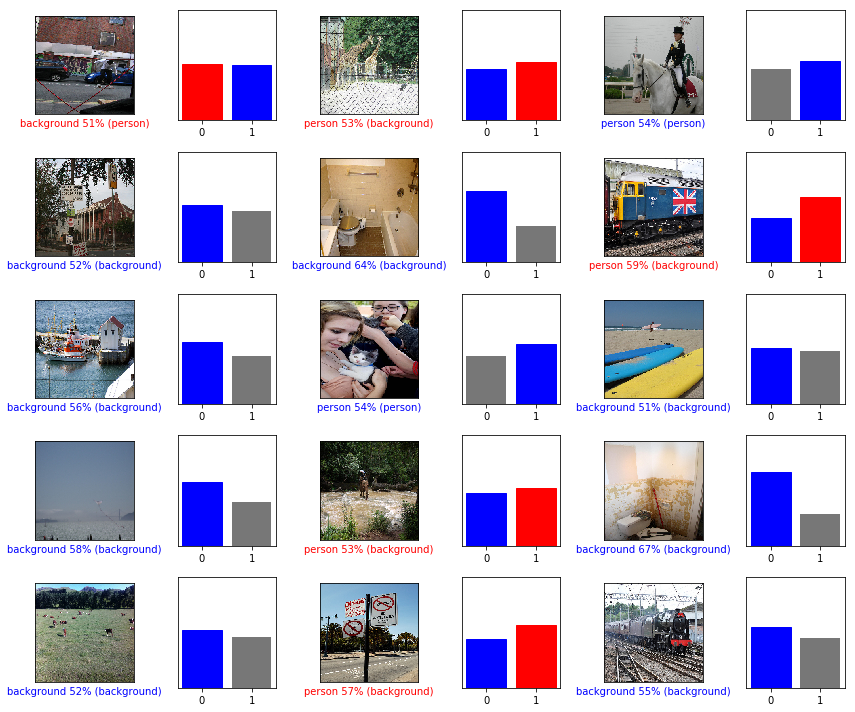

In [104]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(250, 250, 3)
(1, 250, 250, 3)
[[0.4658515  0.53193855]]


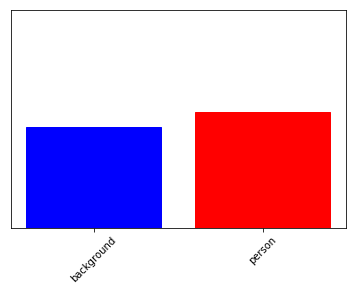

In [105]:
img = test_images[1]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(2), classes, rotation=45)
plt.show()

In [106]:
print(type(test_generator))

<class 'keras_preprocessing.image.dataframe_iterator.DataFrameIterator'>


In [107]:
print(type(test_generator[0]))

<class 'tuple'>


In [108]:
sample_test_images = test_generator[0]

In [109]:
import pickle

In [110]:
with open('sample_test_images.pickle', 'wb') as file:
    pickle.dump(sample_test_images, file)

In [111]:
with open('sample_test_images.pickle', 'rb') as file:
    sample_test_images_reload = pickle.load(file)

In [115]:
sample_test_images_reload[1]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.